## Checking whether a cell has been infercted with malaria or not

Acknowledgement: This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [159]:
import os

In [160]:
data_dir='C:\\Users\\ssafavizadeh\\Documents\\Programming\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images'

In [161]:
os.listdir(data_dir)

['test', 'train']

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [163]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [164]:
test_path

'C:\\Users\\ssafavizadeh\\Documents\\Programming\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\test\\'

In [165]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [166]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [167]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [168]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell

'C:\\Users\\ssafavizadeh\\Documents\\Programming\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [169]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [170]:
imread(para_cell).shape

(148, 142, 3)

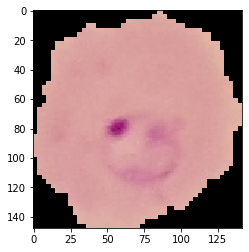

In [171]:
plt.imshow(imread(para_cell))

In [172]:
uninfected_cell = train_path+'uninfected\\'+ os.listdir(train_path+'uninfected')[0]
uninfected_cell

'C:\\Users\\ssafavizadeh\\Documents\\Programming\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

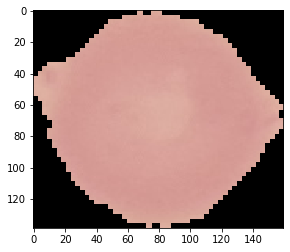

In [173]:
plt.imshow(imread(uninfected_cell))

#### Checking the number of images in each file path

In [174]:
len(os.listdir(train_path+'parasitized'))

12480

In [175]:
len(os.listdir(train_path+'uninfected'))

12480

We have a balanced dataset with equal number of infected and uninfected cell images

In [176]:
len(os.listdir(test_path+'parasitized'))

1300

In [177]:
len(os.listdir(test_path+'uninfected'))

1300

Checking dimensians of images:

In [178]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

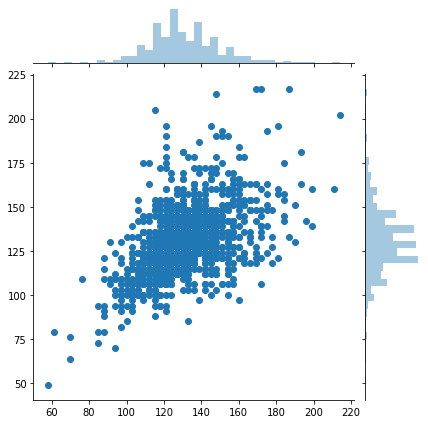

In [179]:
sns.jointplot(dim1,dim2)

CNN will not be able to train on images of different sizes. Thus, we need to resize all images to be the same size. Here we will use average dimensions:

In [180]:
np.mean(dim1)

130.92538461538462

In [181]:
np.mean(dim2)

130.75

In [182]:
image_shape = (130,130,3)

## Data Preparation
There is too much data for to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have:
### ImageDataGenerator
Image manipulation ...

In [183]:
130*130*3

50700

In [184]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [185]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

We can use ImageDataGenerator() for many purposes such as expanding our dataset by randomly rotating the existing images, shifting images across width or height (percentage)  ..., we can also rescale images, cutting a part of the image (shear_range), zoom in on the image (zoom_range), horizontal and vertical flipping, identifying the mode for filling in the missing data,

In [186]:
imread(uninfected_cell)[0]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [187]:
imread(uninfected_cell).max()

0.88235295

In [188]:
imread(para_cell).max()

0.9098039

This data seems to be already normalized and does not need rescaling.

In [189]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

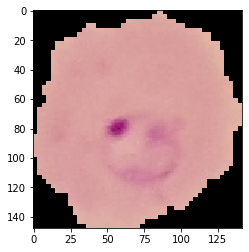

In [190]:
plt.imshow(imread(para_cell))

Random manipulation of the cell image:

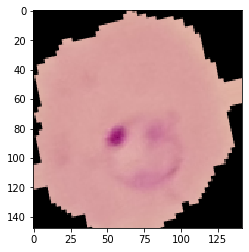

In [191]:
plt.imshow(image_gen.random_transform(imread(para_cell)))

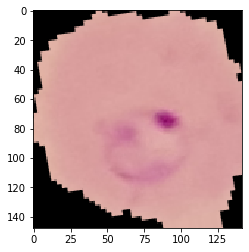

In [192]:
plt.imshow(image_gen.random_transform(imread(para_cell)))

We can now run multiple rounds of transformation on our dataset and multiplly the number of samples!

### Setting up directory to flow batches from directory:
In ordet for this to work we have to classify our samples in sub-directories!

In [193]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [194]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the Model:

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [196]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [197]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

### Adding Early Stopping

In [198]:
from tensorflow.keras.callbacks import EarlyStopping

In [206]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

### Training the Model

In [207]:
# Training on batch size of 16 images at a time. It is typical to use powres of 2! The smaller the batch size, the longer
  # the training time takes. But large batch sizes nees more memory ...
batch_size = 16

In [208]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


**shuffle:** Whether to shuffle the data (default: True)
            If set to False, sorts the data in alphanumeric order.
During training we should shuffle our data. However, when dealing with the test set we should not be shuffling. Otherwise, our labels get shuffled around from our feature points ...

In [209]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [210]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [211]:
import warnings
warnings.filterwarnings('ignore')

In [212]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 554s 355ms/step - loss: 0.1417 - accuracy: 0.9532 - val_loss: 0.1378 - val_accuracy: 0.9519
Epoch 2/20
1560/1560 [==============================] - 534s 342ms/step - loss: 0.1478 - accuracy: 0.9523 - val_loss: 0.1622 - val_accuracy: 0.9454
Epoch 3/20
1560/1560 [==============================] - 576s 369ms/step - loss: 0.1400 - accuracy: 0.9544 - val_loss: 0.1471 - val_accuracy: 0.9500


In [213]:
model.evaluate_generator(test_image_gen)

[0.14430809694972957, 0.9503846]

In [214]:
from tensorflow.keras.models import load_model
model.save('malaria_detector_model.h5')

## Model Evaluation

In [216]:
losses = pd.DataFrame(model.history.history)

In [218]:
losses[['loss','val_loss']]

,loss,val_loss
0,0.141689,0.137769
1,0.147775,0.162177
2,0.140021,0.147090


In [219]:
model.metrics_names

['loss', 'accuracy']

In [220]:
model.evaluate_generator(test_image_gen)

[0.14112952284827726, 0.95269233]

In [221]:
from tensorflow.keras.preprocessing import image

In [223]:
pred_probabilities = model.predict_generator(test_image_gen)

In [224]:
pred_probabilities

array([[1.22487545e-05],
       [0.00000000e+00],
       [4.88758087e-06],
       ...,
       [9.86149192e-01],
       [9.90630925e-01],
       [9.92203236e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

In [225]:
predictions = pred_probabilities > 0.5

In [226]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [227]:
from sklearn.metrics import classification_report,confusion_matrix

In [228]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1300
           1       0.95      0.96      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



In [229]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1234,   66],
       [  49, 1251]], dtype=int64)